# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Importing Customer Demographic Dataset 

In [2]:
CustomerDemographic = pd.read_excel("C:/Users/My/Desktop/KPMG 2/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = 'CustomerDemographic')

In [3]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.4+ KB


# Exploratory Data Analysis

In [5]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [6]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [7]:
CustomerDemographic['gender'].replace('F','Female',True)
CustomerDemographic['gender'].replace('Femal','Female',True)
CustomerDemographic['gender'].replace('U','Undefined',True)
CustomerDemographic['gender'].replace('M','Male',True)

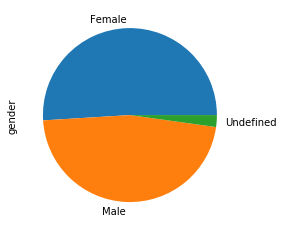

In [8]:
CustomerDemographic['gender'].value_counts().plot(kind = 'pie')

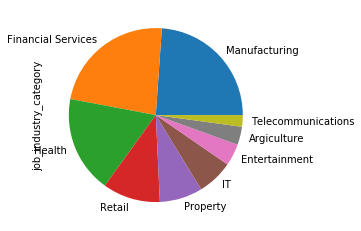

In [9]:
CustomerDemographic['job_industry_category'].value_counts().plot(kind = 'pie')

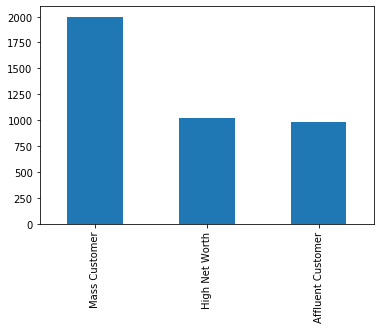

In [10]:
CustomerDemographic['wealth_segment'].value_counts().plot(kind = 'bar')

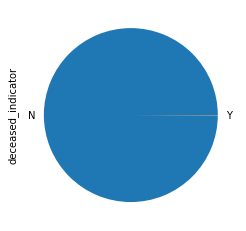

In [11]:
CustomerDemographic['deceased_indicator'].value_counts().plot(kind = 'pie')

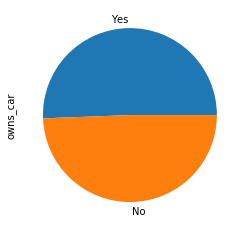

In [12]:
CustomerDemographic['owns_car'].value_counts().plot(kind = 'pie')

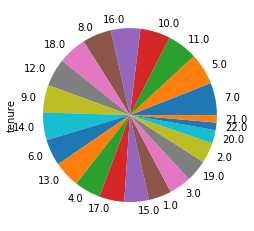

In [13]:
CustomerDemographic['tenure'].value_counts().plot(kind = 'pie')

# Missing value treatment

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)
--------------------------------------------------
customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry

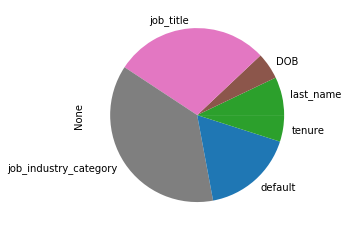

In [14]:
print(CustomerDemographic.isnull().sum())
print(CustomerDemographic.isnull().sum().plot(kind = 'pie'))
print('-'*50)
print(CustomerDemographic.isnull().sum()/CustomerDemographic.shape[0]*100)

In [15]:
#CustomerDemographic.dropna(inplace = True)
CustomerDemographic = CustomerDemographic[-CustomerDemographic['last_name'].isnull()]
CustomerDemographic = CustomerDemographic[-CustomerDemographic['DOB'].isnull()]
CustomerDemographic = CustomerDemographic[-CustomerDemographic['job_title'].isnull()]
CustomerDemographic = CustomerDemographic[-CustomerDemographic['job_industry_category'].isnull()]

In [16]:
print(CustomerDemographic.isnull().sum())

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                150
owns_car                                 0
tenure                                   0
dtype: int64


In [17]:
CustomerDemographic['year'] = pd.DatetimeIndex(CustomerDemographic['DOB']).year
CustomerDemographic['month'] = pd.DatetimeIndex(CustomerDemographic['DOB']).month
CustomerDemographic['age'] = 2021- CustomerDemographic['year']


In [18]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'year', 'month', 'age'],
      dtype='object')

#### Droping all the misleading columns

In [19]:
cols = ['DOB','default','year','month']
CustomerDemographic.drop(cols,axis = 1,inplace =True)

In [20]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [21]:
print(CustomerDemographic.isnull().sum())

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64


-------------------------------------------------------------------------------------------------------------------------------

# Importing Transaction Data Set

In [22]:
Transactions = pd.read_excel("C:/Users/My/Desktop/KPMG 2/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = 'Transactions')

In [23]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [24]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


# Exploratory Data Analysis

In [25]:
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

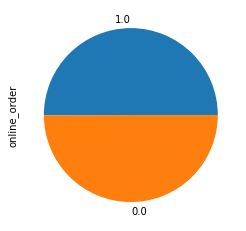

In [26]:
Transactions['online_order'].value_counts().plot(kind = 'pie')

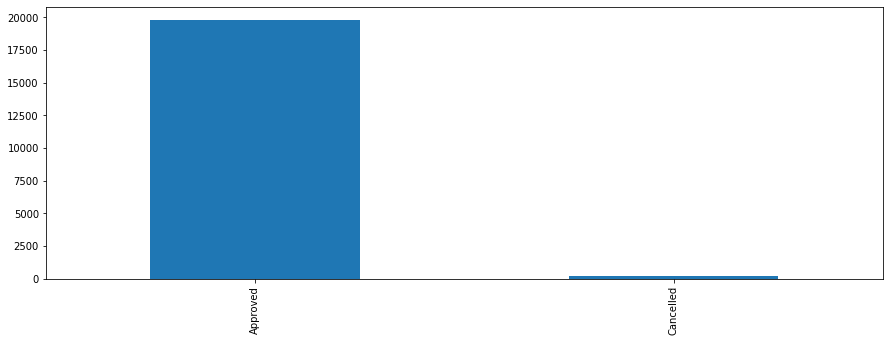

In [27]:
plt.figure(figsize=(15,5))
Transactions['order_status'].value_counts().plot(kind = 'bar')

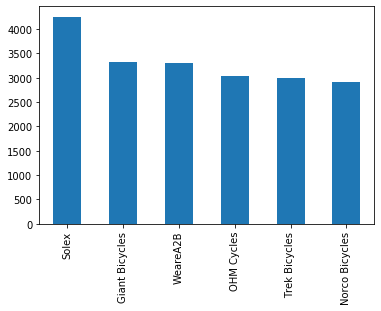

In [28]:
Transactions['brand'].value_counts().plot(kind = 'bar')

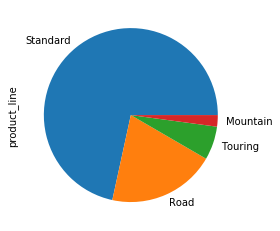

In [29]:
Transactions['product_line'].value_counts().plot(kind = 'pie')

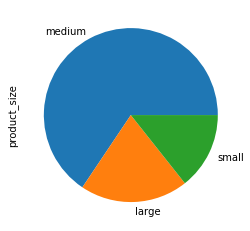

In [30]:
Transactions['product_size'].value_counts().plot(kind = 'pie')

#### Missing Value Treatment

In [ ]:
print(Transactions.isnull().sum())
print(Transactions.isnull().sum().plot(kind = 'pie'))
print('-'*50)
print(Transactions.isnull().sum()/Transactions.shape[0]*100)

In [32]:
Transactions = Transactions[-Transactions['brand'].isnull()]

In [33]:
Transactions = Transactions[-Transactions['online_order'].isnull()]

#### Making a Profit Name Column

In [35]:
Transactions['Profit'] = Transactions['list_price']-Transactions['standard_cost']

In [36]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------

# Importing Customer Address Data Set

In [39]:
CustomerAddress = pd.read_excel("C:/Users/My/Desktop/KPMG 2/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name = 'CustomerAddress')

In [40]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [41]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# Exploratory Data Analysis

In [43]:
CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [44]:
CustomerAddress['state'].replace('NSW','New South Wales',True)
CustomerAddress['state'].replace('VIC','Victoria',True)

In [45]:
CustomerAddress['state'].value_counts()

New South Wales    2140
Victoria           1021
QLD                 838
Name: state, dtype: int64

In [46]:
CustomerAddress.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64